# Storytelling based on an image

- using Generative AI to create a Graphic Novel
- Leveraging AI Vision and Chat Models for
  - Image Summarization
  - Stable Diffusion Prompt Generation
  - Creation of the Story Outline

## Jupyter Notebook Setup

In [16]:
%pip install -qU langchain openai pillow
%pip install -qU langchain_openai


[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


#### API Key setup

In [12]:
import getpass
import os


if "OPENAI_API_KEY" not in os.environ:
    os.environ["OPENAI_API_KEY"] = getpass.getpass("Provide your OpenAI API Key")

#### Enable LangSmith

In [13]:
import os
import uuid, datetime


uid = uuid.uuid4().hex[:6]
current_time = datetime.datetime.now().strftime("%Y%m%d_%H%M%S")


project_name = f"openai_image_summarization_{current_time}"
os.environ["LANGCHAIN_TRACING_V2"]="true"
os.environ["LANGCHAIN_PROJECT"]=project_name

## Multimodal support


- use LangChain and Vision models to describe the image
- current examples are based on images from the CIVITAI.com site
- REMINDER:  show your support for the artists and Checkpoint model builders on Civitai

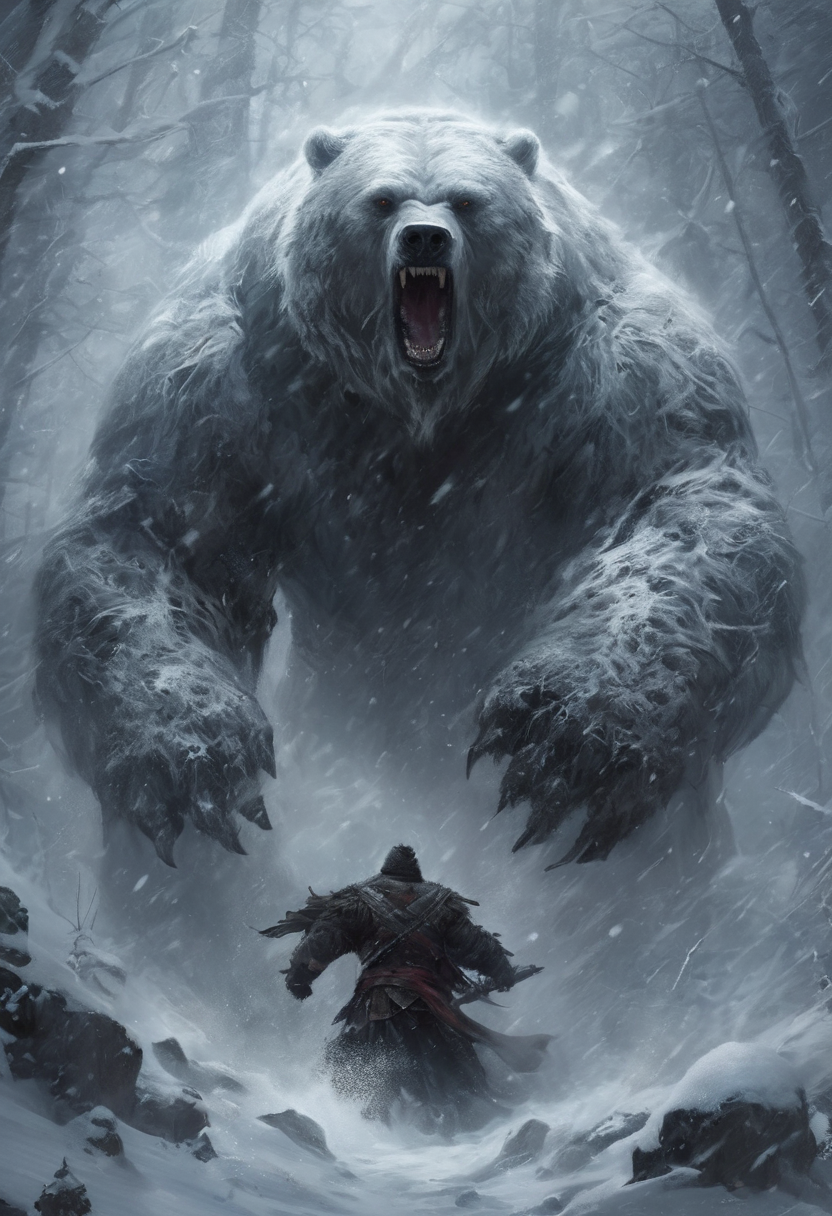

In [14]:
import requests
from IPython.display import Image

image_url = "https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/15b17bf0-fb1a-4fb2-b952-beee07706068/original=true/00088-3178799381.jpeg"

content = requests.get(image_url).content
Image(content)

### Vision Model Image Summarization code

In [17]:
from langchain_core.messages import HumanMessage
from langchain_openai import ChatOpenAI


def image_summarize(prompt):
    """Make image summary"""
    chat = ChatOpenAI(model="gpt-4-vision-preview", max_tokens=1024)


    msg = chat.invoke(
        [
            HumanMessage(
                content=[
                    {"type": "text", "text": prompt},
                    {
                        "type": "image_url",
                        "image_url": {"url": image_url},
                    },
                ]
            )
        ]
    )
    return msg.content


### Image Analysis Prompt

In [18]:
analysis_prompt_text = """
You are a helpful AI Assistant, tasked with following the provided instructions step by step.  Follow the instructions and do not editorialize or add your own opinions.

Begin your image analysis by following these steps:
- Initial Impression: Describe your first reaction to the image and the overall mood or emotion it conveys.
- Contextual Background: If known, provide any relevant historical, cultural, or artistic context of the image.
- Detailed Walkthrough: Use art analysis techniques for a detailed examination of the image, focusing on composition, symbolism, and artistic choices.
- Unrealistic and Fantastical Elements: Focus on features that are unrealistic or symbolic, especially in depictions of humans, creatures, or environments. Discuss how they differ from real-life counterparts and their potential meanings.

Provide structured summaries in the following categories (leave blank if not applicable):
- Medium: (e.g., oil painting, digital art, charcoal drawing, watercolor)
- Subject: (e.g., portrait of a person, landscape scene, abstract concepts, animal depiction, still life, historical event)
- Scene: (e.g., indoor setting, natural landscape, urban streetscape, fantastical realm, historical setting)
- Style: (e.g., realism, abstract, impressionism, surrealism, expressionism, pop art)
- Artistic Influence or Movement: (e.g., Renaissance, Modernism, Baroque, Cubism, Art Nouveau, Street Art)
- Color Palette: (e.g., warm tones, cool tones, monochromatic, vibrant contrasts, pastel hues)
- Lighting: (e.g., natural daylight, artificial/studio light, soft ambient, harsh contrasts)
- Technique and Execution: (e.g., detailed brushwork, loose strokes, precise photography, digital manipulation, collage elements)
- Anatomy and Features: (e.g., realistic facial expressions, stylized figures, detailed landscapes, abstract forms, exaggerated proportions)
- Details and Transformations: (e.g., symbolic elements like flowers or animals, mythological aspects, surreal alterations, allegorical representations)
- Composition and Symbolism: (e.g., balanced composition, asymmetry, use of negative space, symbolic motifs, narrative themes)
- Emotional Tone: (e.g., serene, vibrant, melancholic, ominous, joyful, contemplative)
- Cultural Significance: (e.g., representation of a cultural identity, commentary on social issues, historical significance, religious symbolism)
- Interactive Elements: (For digital/multimedia art: audience interaction, motion elements, virtual/augmented reality components)
- Viewer's Perspective: (Speculate on potential viewer reactions, emotional responses, interpretative variations)
- Comparative Analysis: (Compare with other works by the same artist, within the same genre, or across different artistic periods)
- leading industry sites where this work would be featured:
- leading industry awards for this work:
- leading industry artists and photographers who do similar work, focusing on breakthrough artists:
- leading industry publications featuring this type of work:
- leading galleries featuring this type of work: 
- Additional Details: (Other noteworthy aspects such as unique framing, textural qualities, innovative materials used)

Conclude your analysis with:
- Overall Interpretation of the encounter: Summarize your comprehensive understanding of the image, integrating the various elements you have analyzed.
"""

#### Image Analysis

In [21]:
analysis_result = image_summarize(analysis_prompt_text)

In [22]:
print(analysis_result)

- Initial Impression: The image is intense and conveys a sense of danger and confrontation. The overwhelming size of the bear compared to the human figure suggests an epic struggle for survival.

- Contextual Background: Without specific historical or cultural context, this image seems to draw inspiration from fantasy or mythological themes where humans face monstrous creatures.

- Detailed Walkthrough: 
The composition of the image centers on the confrontation between a massive bear and a smaller human figure. The bear dominates the frame, its mouth agape in a roar, with sharp teeth and glowing eyes that add to its menacing presence. The human figure, facing away from the viewer, appears poised for a fight or flight, conveying a narrative of bravery or desperation. The snowy environment and the blizzard conditions heighten the sense of isolation and the epic nature of the encounter.

The color palette consists of cool tones, with the whites and grays of the snow blending with the dark

## Stable Diffusion Prompt Generation

In [23]:
llm = ChatOpenAI(model="gpt-4")
result = llm.invoke(f"""You are a helpful AI Assistant tasked with creating a Stable Diffusion prompt to generate an image for {analysis_result}.
                    Keep the prompt concise by using industry terminology.  The prompt should be less than 80 tokens.
                    Describe the image as if it already exists and has received numerous awards.
                    The terms selected should create an image that is unique and spectacular, focusing on terms used by leading industry experts and galleries to describe great art.
                    Place the names of 'leading industry' and galleries at the end of the prompt.  Focus on using these experts to identify the best terms to use in the prompt.
                    Priority must be placed on including terms that best describe the image for Stable Diffusion.  Avoid filler terms.
                    Do not include the terms: 'create', 'should'""")
print(result.content)

"An award-winning digital artwork portrays a thrilling confrontation between a human and a monstrous, oversized bear in a snowy landscape. The scene, noted for its realism enhanced with fantastical elements, employs a cool, overcast palette to underscore the harshness and isolation of the setting. The bear, with its glowing eyes and detailed fur, encompasses the frame, creating a supernatural aura, while the human figure, dressed in historical or fantasy attire, stands defiant. The composition is symbolic of an epic battle against overwhelming odds, resonating with fantasy and mythological themes, and has been featured on ArtStation and DeviantArt, and in publications like ImagineFX and Heavy Metal Magazine. This work has been exhibited in Gallery Nucleus and the Society of Illustrators."


### Story Outline Creation

In [24]:
story_prompt_text = f"""
You are a helpful AI Assistant, tasked with following the provided instructions and using the following image analysis as the basis for writing a short story, including subplots:  {analysis_result}.

You must include the following elements in your story outline:
Setting the Scene: Clearly define the story's setting, emphasizing its significance to the narrative. Detail the environment, era, and cultural or societal norms to ground the story. Highlight how the setting influences the plot and character development.
Character Introduction: Introduce characters with vivid descriptions and depth. Focus on visual details, psychological depth, motivations, and their evolution over the story. Illustrate how their backgrounds and personalities impact the narrative's progression.
Plot Development: Structure the plot with a clear beginning, middle, and end, pinpointing the central conflict and pivotal events. Discuss the stakes involved and the challenges the characters face, ensuring each event propels the story towards its climax.
Themes and Motifs: Elaborate on the themes or motifs, linking them directly to the characters' journeys and the story's events. Discuss how these elements reflect broader societal, philosophical, or moral questions, enriching the narrative's layers.
Narrative Perspective: Choose a narrative perspective that best serves the story, explaining its role in connecting the reader to the characters and events. Whether first-person, third-person omniscient, or limited, justify its use in enhancing storytelling.
Dialogue and Interaction: Craft dialogue that reflects character personalities, advances the plot, and reveals key information subtly. Discuss the dynamics between characters through their interactions, showcasing conflict, alliances, or growth.
Climax and Resolution: Design a climax that is the natural culmination of the story's tension and conflicts. Outline how the resolution offers closure, addresses the central conflict, and reflects on the characters' growth or changes.
Symbolism and Imagery: Integrate symbolism and imagery to deepen the narrative's meaning and emotional resonance. Specify how these elements symbolize themes, character traits, or plot developments, adding layers of interpretation.
Style and Tone: Define the narrative's style and tone, ensuring they complement the story's themes and setting. Whether descriptive, concise, or humorous, clarify how the chosen style and tone influence reader perception and engagement.
Reader Engagement: Identify strategies to captivate and maintain reader interest. Include elements like suspense, emotional investment, relatable characters, or thought-provoking questions to keep readers engaged and reflective.
Revision and Refinement: Emphasize the importance of revising and refining the story. Discuss aspects like pacing, coherence, character consistency, and narrative clarity that could be enhanced in subsequent drafts.
Feedback and Iteration: Encourage seeking feedback from beta readers or writing groups and being open to iterative revisions. Highlight the value of external perspectives in identifying strengths and weaknesses not apparent to the author.
Reflective Analysis of Narrative Arc and Character Development: After detailing the structural elements of your story, take a step back to reflect on the overall narrative arc and the development of your characters. Evaluate how each component of the story—setting, plot, character dynamics, themes, motifs, narrative perspective, dialogue, symbolism, and style—interacts to form a cohesive and engaging narrative. Consider the journey your characters undergo and how their transformations or lack thereof resonate with the themes you’ve explored. Assess whether the narrative arc fulfills the promise made to the reader at the beginning and if the resolution ties together the key elements of the story in a satisfying manner. This reflective analysis is crucial for ensuring that all parts of your story work in harmony, reinforcing the narrative's impact and the readers' emotional investment.
"""

In [25]:
llm = ChatOpenAI(model="gpt-4")
story_prompt_result = llm.invoke(story_prompt_text)
print(story_prompt_result.content)

Story Outline:

Setting the Scene: 
Our story unfolds in a semi-historical, semi-fantasy world, akin to the dark ages, with a twist of mythical creatures. This harsh, snowy wilderness is largely unexplored, and the societal norms revolve around survival rather than civility. The setting significantly influences the plot, as the characters must not only navigate their interpersonal conflicts but also the unforgiving environment.

Character Introduction:
Our protagonist is an exiled warrior, driven from his town due to a grave misunderstanding. He is a rugged figure, clad in furs and leathers, a symbol of hardiness and resilience. His psychological depth lies in his struggle to survive and redeem his honor whilst battling loneliness and the harsh wilderness.

Plot Development:
The story begins with the protagonist's exile, leading to his encounter with the monstrous bear. This confrontation serves as the central conflict, driving the narrative towards the climax. The stakes are high, wit

### Refine the Story

In [26]:
refine_prompt_text = f"""
You are a helpful AI Assistant, tasked with following the provided instructions and using the provided story outline to enhance the story:{story_prompt_result.content}

Based on the outline received, I am entrusting you with the direct enhancement of the story to boost its appeal and depth, aiming for a strong resonance with publishers and readers. As the lead creative force behind this story's evolution, your task is to directly implement changes and additions. You are not here to advise or critique; you are the craftsman to sculpt the narrative, plot, and characters. Here are your specific responsibilities:

You must proceed step by step and include the following elements in the story:
1. Expand World-Building Details: Inject rich, vivid descriptions and lore that make the world come alive. Be specific about the cultures, landscapes, and technologies that define this universe.
2. Deepen Character Backstories: Develop comprehensive backstories for main and supporting characters, detailing their motivations, fears, and transformations. Show how their pasts shape their current actions and decisions.
3. Enhance the Romantic Subplot: Weave a compelling and nuanced romantic subplot that adds depth to the story without overshadowing the main plot. Describe the dynamics and evolution of this relationship.
4. Incorporate Varied Perspectives: Introduce chapters or sections from different characters' viewpoints to add depth and diversity to the narrative. Explain how these perspectives contribute to the overall story.
5. Introduce Moral Ambiguities: Create scenarios where characters face moral dilemmas, forcing them and the readers to grapple with shades of right and wrong. Outline these dilemmas and their impacts on the plot.
6. Strengthen the Antagonist's Motivation: Flesh out the antagonist's background and motivations, making them a more relatable and formidable force. Explain their goals and the reasoning behind their actions.
7. Utilize Symbolism Effectively: Embed symbols throughout the story that enhance thematic depth and character development. Identify these symbols and their meanings.
8. Balance Action with Character Development: Ensure action scenes contribute to character growth and plot advancement. Describe how each major action scene achieves this balance.
9. Refine the Climax and Resolution: Craft a climax and resolution that are satisfying and coherent, tying up loose ends and reflecting character arcs. Detail these pivotal moments and their outcomes.
10. Solicit Targeted Feedback: Identify key areas for feedback that will specifically enhance the story's quality. List these areas and the type of feedback you're seeking.
11. Reflect on Series Potential: Explore potential for expanding the story into a series. Propose initial ideas for how the story could evolve in future installments.

Your contributions will be instrumental in transforming the narrative. Approach this task as an integral part of the creative team, directly shaping the story's destiny.

"""

In [27]:
llm = ChatOpenAI(model="gpt-4")
refine_prompt_result = llm.invoke(refine_prompt_text)
print(refine_prompt_result.content)

World-Building Details:
The mythical world is rich with diverse cultures and landscapes, from the nomadic tribes in the northern tundras to the bustling cities of the south. A mixture of primitive and steam-powered technologies coexist, giving each culture its own unique identity. The protagonist hails from the northern tribes, known for their survival skills and warrior prowess. The wilderness is a living entity, with its ancient forests, towering mountains, and treacherous ice caves.

Character Backstories:
The protagonist, known as Thoren, was once a respected warrior of his tribe, falsely accused of betraying his people. His exile was orchestrated by the cunning Jarl, who saw Thoren as a threat to his power. Thoren's motivation for survival and redemption stem from his desire to clear his name and regain his honor. His past is haunted by the loss of his family, intensifying his isolation and loneliness.

Romantic Subplot:
During his exile, Thoren rescues a mysterious woman named Fr

### Refine the Image

In [28]:
llm = ChatOpenAI(model="gpt-4")
result = llm.invoke(f"""Create a Stable Diffusion prompt to capture the climactic moment from {refine_prompt_result}.
                    Keep the prompt concise by using industry terminology.  The prompt should be less than 80 tokens.
                    Describe the image as if it already exists and has received numerous awards.
                    Describe the image as if viewed by someone who has not read the story and will not know character names. focus on what the viewer sees and the emotional impact and narrative significance.
                    The terms selected should create an image that is unique and spectacular, focusing on terms used by leading industry experts and galleries to describe great art.
                    Place the names of 'leading industry' and galleries at the end of the prompt.  Focus on using these experts to identify the best terms to use in the prompt.
                    Priority must be placed on including terms that best describe the image for Stable Diffusion.  Avoid filler terms.
                    Do not include the terms: 'create', 'should'""")
print(result.content)

"An evocative, award-winning tableau in the realm of fantasy art, where the primal and the ethereal converge. The heart of the scene lies in the final duel between a rugged warrior, defined by his raw strength and survival instincts, and a monstrous bear, an embodiment of revenge and dark magic. A chilling wilderness of ancient towering trees and treacherous icy grounds encloses them, mirroring the isolation and grit of the protagonist. A sense of profound resolution pervades the air as the warrior, driven by a newfound understanding, raises his weapon not for revenge, but mercy. A young sorceress, her eyes filled with a mix of fear and hope, watches from afar, her magic pendant glinting in the low light. The image is a climactic culmination of an intricate narrative, effortlessly intertwining a subtle romance with the protagonist's quest for redemption against a backdrop of diverse cultures and landscapes. This piece has been hailed by leading industry experts and galleries such as th